<a href="https://colab.research.google.com/github/ram-elgov/Statistics-For-CS/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [11]:
X=np.array([8,2,-13,4,-9,0,18,4,-5,10,1,-7,7,13,-5,-16,-9,18,-10,0])
def Empirical_F(X):
  """Calculates the empirical CDF for a given probability space.

        Parameters
        ----------
        x : np.array
            The given probability space (default is None)
        
        Returns
        -------
        np.array
                    A matrix with two columns. The first is the value from x and
                    the second column holds the corsponding CDF
                    for that value.
  """
  n=len(X)
  d=dict()
  cdf=0
  for w in sorted(X):
    if d.get(w) is None:
      d[w]=1
    else:
      d[w]=d[w]+1
  w = list()
  f = list()
  for value,occurrences in d.items():
    cdf += occurrences / n
    for i in range(occurrences):
      w.append(value)
      f.append(cdf)
  res = np.array([w,f]).transpose()
  return res
  
a=Empirical_F(X)
print(a)


[[-16.     0.05]
 [-13.     0.1 ]
 [-10.     0.15]
 [ -9.     0.25]
 [ -9.     0.25]
 [ -7.     0.3 ]
 [ -5.     0.4 ]
 [ -5.     0.4 ]
 [  0.     0.5 ]
 [  0.     0.5 ]
 [  1.     0.55]
 [  2.     0.6 ]
 [  4.     0.7 ]
 [  4.     0.7 ]
 [  7.     0.75]
 [  8.     0.8 ]
 [ 10.     0.85]
 [ 13.     0.9 ]
 [ 18.     1.  ]
 [ 18.     1.  ]]


In [58]:

X=binom.rvs(n=5,p=1/6,size=1000)

In [59]:
bin = Empirical_F(X)

In [60]:
bin

array([[0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0.   , 0.404],
       [0. 

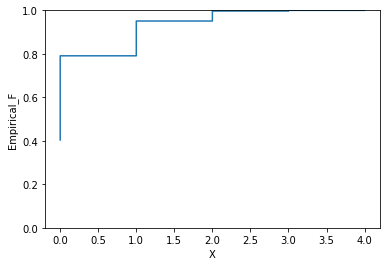

In [61]:
plt.xlabel('X')
plt.ylabel('Empirical_F')
plt.ylim(0, 1)
plt.step(x=bin[:,0],y=bin[:,1])
plt.show()

In [62]:
Y=np.array([0,1,2,3,4,5])
theoretical = binom.cdf(Y,5,1/6)

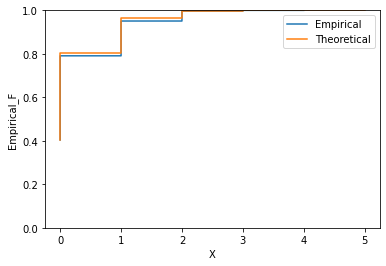

In [64]:
plt.xlabel('X')
plt.ylabel('Empirical_F')
plt.ylim(0, 1)
plt.step(x=bin[:,0],y=bin[:,1])
plt.step(x=Y, y=theoretical)
plt.legend(['Empirical', 'Theoretical'])
plt.show()

In [3]:
import pandas as pd
df=pd.read_csv("/content/appendicitis.csv")
df=pd.DataFrame(df)
df.head()


,Sex,Age,Pathology
0,Male,72,1
1,Female,88,1
2,Male,74,1
3,Female,69,1
4,Female,69,2


In [4]:
def Empirical_P(X, w):
  """Calculates the empirical probability for a given probability space.

        Parameters
        ----------
        x : np.array
            The given probability space (default is None)
        w : float
            The value to calculate empirical probability for
        
        Returns
        -------
        float
                The empirical  P(w) 
  """
  size = 0
  w_count = 0
  for val in X:
      size+=1
      if val==w:
        w_count+=1
  return w_count/size
Empirical_P(df["Pathology"],2)


0.24344569288389514

In [5]:
df.groupby(["Sex", "Pathology"]).count()

Age
Sex    Pathology     
Female 1          101
       2           47
Male   1          101
       2           18

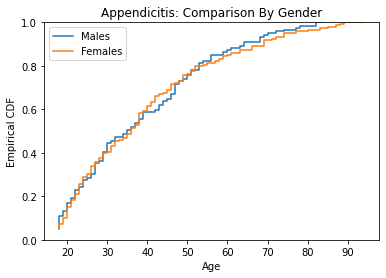

In [16]:
X_Male=df[df["Sex"]=="Male"]["Age"]
X_Female=df[df["Sex"]=="Female"]["Age"]
emp_male=Empirical_F(X_Male)
emp_female=Empirical_F(X_Female)
plt.xlabel('Age')
plt.ylabel('Empirical CDF')
plt.ylim(0, 1)
plt.title("Appendicitis: Comparison By Gender")
plt.step(x=emp_male[:,0],y=emp_male[:,1])
plt.step(x=emp_female[:,0], y=emp_female[:,1])
plt.legend(['Males', 'Females'])
plt.show()

In [24]:
mu=2
X=poisson.rvs(mu,size=20)
print(X)

[0 4 1 5 1 1 2 2 2 3 0 3 3 2 2 0 2 1 0 1]


In [25]:
emp_CDF=Empirical_F(X)

In [29]:
print(emp_CDF)

[[0.   0.2 ]
 [0.   0.2 ]
 [0.   0.2 ]
 [0.   0.2 ]
 [1.   0.45]
 [1.   0.45]
 [1.   0.45]
 [1.   0.45]
 [1.   0.45]
 [2.   0.75]
 [2.   0.75]
 [2.   0.75]
 [2.   0.75]
 [2.   0.75]
 [2.   0.75]
 [3.   0.9 ]
 [3.   0.9 ]
 [3.   0.9 ]
 [4.   0.95]
 [5.   1.  ]]


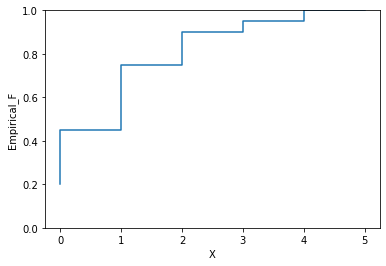

In [28]:
plt.xlabel('X')
plt.ylabel('Empirical_F')
plt.ylim(0, 1)
plt.step(x=emp_CDF[:,0],y=emp_CDF[:,1])
plt.show()

In [31]:
import array
Y=np.array([0,1,2,3,4,5])
theoretical = poisson.cdf(k=Y,mu=mu)
print(theoretical)

[0.13533528 0.40600585 0.67667642 0.85712346 0.94734698 0.98343639]
